In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train_df = pd.read_csv("/content/drive/MyDrive/Datasets/p2/Train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Datasets/p2/Test.csv")

In [3]:
train_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'H', 'Diameter', 'Eccentricity (e)',
       'Semi-major axis', 'Inclination', 'om', 'w', 'Mean Anomaly',
       'Aphelion distance', 'Mean distance', 'tp_r', 'tp', 'tp_cal', 'per',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms',
       'Hazard_rate'],
      dtype='object')

In [4]:
train_df.head()

,Unnamed: 0,ID,Name,H,Diameter,Eccentricity (e),Semi-major axis,Inclination,om,w,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,Hazard_rate
0,0,1373446,ASTRD_1373446,16.800,66.678797,0.126741,2.485660,3.143874,120.677652,117.882909,...,0.000007,0.000082,0.000088,0.000033,1.929900e-08,2.599500e-09,0.000133,0.000015,0.57434,2.343475e-10
1,1,1167163,ASTRD_1167163,13.600,43.978074,0.068699,5.179780,13.167953,47.895421,274.408421,...,0.000010,0.000038,0.000137,0.000145,2.785400e-07,6.310200e-09,0.001791,0.000325,0.65483,8.551449e-01
2,2,1561386,ASTRD_1561386,16.200,54.297412,0.058680,3.160177,10.633791,112.361130,156.006162,...,0.000007,0.000048,0.000095,0.000096,1.408800e-07,1.108200e-08,0.000531,0.000130,0.58243,2.765159e+00
3,3,1530781,ASTRD_1530781,18.758,64.450052,0.190161,2.332643,1.312655,250.220200,140.158954,...,0.000010,0.000367,0.000370,0.000040,2.546700e-08,3.806700e-09,0.000145,0.000018,0.45738,2.321385e-10
4,4,1332617,ASTRD_1332617,16.500,55.488104,0.313855,2.334281,3.649729,220.810491,132.313188,...,0.000005,0.000086,0.000087,0.000015,1.674700e-08,2.263600e-09,0.000051,0.000011,0.56356,8.146003e-02


In [5]:
# dropping obviosuly useless columns
train_df.drop(columns=["Unnamed: 0", "ID", "Name"], inplace=True)
test_df.drop(columns=["Unnamed: 0", "ID", "Name"], inplace=True)

In [6]:
# checking for nan values
train_df.isnull().sum()

H                      0
Diameter             954
Eccentricity (e)       0
Semi-major axis        0
Inclination            0
om                   954
w                    954
Mean Anomaly           0
Aphelion distance    954
Mean distance          0
tp_r                 954
tp                     0
tp_cal                 0
per                    0
sigma_e                0
sigma_a              954
sigma_q              954
sigma_i                0
sigma_om               0
sigma_w                0
sigma_ma             954
sigma_ad               0
sigma_n                0
sigma_tp               0
sigma_per            954
rms                    0
Hazard_rate            0
dtype: int64

In [7]:
# %ge of nan values
(954/len(train_df))*100

0.09980353141300459

In [8]:
# dropping nan values because its a real small %ge of values in hand
train_df.dropna(inplace=True)

In [9]:
# EDA
train_df.corr()

,H,Diameter,Eccentricity (e),Semi-major axis,Inclination,om,w,Mean Anomaly,Aphelion distance,Mean distance,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,Hazard_rate
H,1.000000,0.649272,0.361018,-0.018028,0.098726,0.005557,0.009525,-0.030797,0.519039,0.419152,...,-0.010873,-0.002071,-0.010242,-0.010240,-0.004870,-0.000846,-0.010314,-0.004936,0.001664,-0.009437
Diameter,0.649272,1.000000,0.525817,-0.021838,-0.024496,0.010578,0.012888,-0.046525,-0.073256,0.567881,...,-0.013359,-0.002837,-0.012491,-0.012488,-0.005956,-0.001380,-0.012578,-0.005888,0.003814,-0.012084
Eccentricity (e),0.361018,0.525817,1.000000,0.000824,0.006315,0.003069,-0.000564,-0.037031,-0.022014,0.149414,...,-0.003654,-0.001350,-0.006661,-0.006660,0.002251,0.000430,-0.006709,0.003302,-0.005596,-0.006038
Semi-major axis,-0.018028,-0.021838,0.000824,1.000000,0.001980,-0.002459,-0.001366,0.001308,0.070413,-0.023426,...,0.005515,0.000795,0.005118,0.005117,0.027719,0.000351,0.005163,0.325963,-0.000162,0.005127
Inclination,0.098726,-0.024496,0.006315,0.001980,1.000000,0.000951,-0.000011,0.000777,0.263900,0.006479,...,0.000374,-0.000159,-0.000259,-0.000259,0.000388,-0.000088,-0.000259,0.000806,-0.000479,-0.000113
om,0.005557,0.010578,0.003069,-0.002459,0.000951,1.000000,-0.089381,-0.005646,0.000387,0.020548,...,-0.000640,-0.001627,-0.000501,-0.000501,0.000398,-0.001058,-0.000549,-0.000110,-0.001278,-0.001636
w,0.009525,0.012888,-0.000564,-0.001366,-0.000011,-0.089381,1.000000,-0.053681,0.000507,0.019842,...,-0.001107,0.001358,-0.001669,-0.001670,0.000263,0.000305,-0.001651,-0.000117,0.004389,-0.001160
Mean Anomaly,-0.030797,-0.046525,-0.037031,0.001308,0.000777,-0.005646,-0.053681,1.000000,0.001139,0.005551,...,-0.000591,0.001597,-0.001485,-0.001483,-0.002005,0.002161,-0.001582,-0.001376,-0.001275,-0.001152
Aphelion distance,0.519039,-0.073256,-0.022014,0.070413,0.263900,0.000387,0.000507,0.001139,1.000000,-0.021215,...,0.000029,-0.000038,0.000040,0.000040,0.001805,-0.000080,0.000041,0.022723,-0.000488,0.000842
Mean distance,0.419152,0.567881,0.149414,-0.023426,0.006479,0.020548,0.019842,0.005551,-0.021215,1.000000,...,-0.007352,-0.001966,-0.006657,-0.006655,-0.003368,-0.001539,-0.006704,-0.003596,0.004242,-0.006519


Choosing a deep neural network architechrue so I dont have to worry about feature selection.

(Tried, but due to lack of time in the hackathon will devote more time to hyperparametter tuning as the NN can take care of this selection and extraction)

In [10]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=["Hazard_rate"]).values
y = train_df["Hazard_rate"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Chose MinMaxScaler instead of StandardScaler as I've observed that MinMax helps preserve postive predictions (as required in this case).

Because -ve hazard rates wouldnt make sense.

In [11]:
# Normalizing the data

from sklearn.preprocessing import MinMaxScaler
scalar_X = MinMaxScaler()
X_train_scaled = scalar_X.fit_transform(X_train)
X_test_scaled = scalar_X.transform(X_test)
scalar_y = MinMaxScaler()
y_train_scaled = scalar_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scalar_y.transform(y_test.reshape(-1, 1))

In [12]:
!pip install keras-tuner --quiet

# Restart runtime if you're running this cell for the first time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.8 MB/s eta 0:00:00


In [13]:
# Total number of features
len(X_train_scaled[0])

26

In [14]:
from tensorflow import keras
import keras_tuner as kt

def build_model_tune_activations(hp):
    """
    Build a model with hyperparameters.
    Structured as a function so that it can also be passed to the tuner to find these best parameters.
    """
    inputs = keras.Input(shape=(26,))
    x = inputs
    for i in range(hp.Int("num_layers", 5, 10)):
        x = keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), 
                               activation=hp.Choice(f"activation_{i}", ["relu", "leaky_relu"]))(x)
        if hp.Boolean(f"dropout_{i}"):
            x = keras.layers.Dropout(rate=0.50)(x)
    outputs = keras.layers.Dense(1, activation="linear")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='mse',
                  metrics=['mae'])
    return model

In [15]:
# another version for building a model without tuning activation functions for faster output, just the number of neurons
def build_model_dont_tune_activations(hp):
    """
    Build a model with hyperparameters.
    Structured as a function so that it can also be passed to the tuner to find these best parameters.
    """
    inputs = keras.Input(shape=(26,))
    x = inputs
    for i in range(hp.Int("num_layers", 5, 10)):
        x = keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation="relu")(x)
        if hp.Boolean(f"dropout_{i}"):
            x = keras.layers.Dropout(rate=0.50)(x)
    outputs = keras.layers.Dense(1, activation="linear")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='mse',
                  metrics=['mae'])
    return model

I used the [HyperBand algorithm](https://medium.com/criteo-engineering/hyper-parameter-optimization-algorithms-2fe447525903#:~:text=Hyperband%20is%20a%20variation%20of,sets%20in%20the%20search%20space.) to find the best set of parameters (takes over half a day to run), but if you want to rerun the notebook and obtain a good set of parameters faster, you can use the RandomSearch (takes around 35 min depending on how many `max_trials` you set) one as well.

You can stop training in between and continue other cells as well thanks to how the tuner works.

Also details and scores for each of your trials will be stored in `my_dir/hazard`, so you can use that for future write ups or a starting point for futher tuning loops

Using EarlyStopping Callback

In [16]:
# functions for hyperparameter tuning
def tune_hyperband(build_func):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    tuner = kt.Hyperband(build_model, 
                         objective='val_mae',
                         max_epochs=100, factor=3, 
                         directory='my_dir', 
                         project_name='hazard_rate')
    tuner.search(X_train_scaled, y_train_scaled, epochs=100, validation_data=(X_test_scaled, y_test_scaled), callbacks=[early_stop], batch_size=512)
    best_hyps=tuner.get_best_hyperparameters()[0]
    return best_hyps
        

def tune_random_search(build_func, max_trials, execs_per_trial):
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    tuner = kt.RandomSearch(build_func,
                         objective='val_mae',
                         max_trials=max_trials,
                         executions_per_trial=execs_per_trial,
                         directory='my_dir',
                         project_name='hazard')
    tuner.search(X_train_scaled, y_train_scaled, epochs=100, validation_data=(X_test_scaled, y_test_scaled), callbacks=[early_stop], batch_size=512)
    best_hps=tuner.get_best_hyperparameters()[0]
    return best_hps

In [17]:
# Saved model is the one fully tuned with hyperband, but using random search for faster results
hyps = tune_random_search(build_model_dont_tune_activations, 20, 1)

Trial 20 Complete [00h 02m 04s]
val_mae: 1.525628067611251e-05

Best val_mae So Far: 1.1896777323272545e-05
Total elapsed time: 00h 33m 56s


In [18]:
model = build_model_dont_tune_activations(hyps)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, validation_data=(X_test_scaled, y_test_scaled), callbacks=[early_stop], batch_size=512)

Epoch 1/100
1493/1493 [==============================] - 10s 5ms/step - loss: 1.5747e-05 - mae: 4.1134e-04 - val_loss: 5.9886e-07 - val_mae: 1.1028e-05
Epoch 2/100
1493/1493 [==============================] - 7s 5ms/step - loss: 1.2313e-05 - mae: 7.9343e-05 - val_loss: 2.0417e-06 - val_mae: 1.8207e-05
Epoch 3/100
1493/1493 [==============================] - 8s 6ms/step - loss: 4.8412e-06 - mae: 6.0645e-05 - val_loss: 2.0410e-06 - val_mae: 1.4225e-05
Epoch 4/100
1493/1493 [==============================] - 7s 5ms/step - loss: 4.8468e-06 - mae: 7.8003e-05 - val_loss: 2.0429e-06 - val_mae: 4.9410e-05
Epoch 5/100
1493/1493 [==============================] - 8s 5ms/step - loss: 4.8579e-06 - mae: 9.1488e-05 - val_loss: 2.2951e-06 - val_mae: 5.0325e-04
Epoch 6/100
1493/1493 [==============================] - 8s 6ms/step - loss: 4.8571e-06 - mae: 8.8075e-05 - val_loss: 2.0421e-06 - val_mae: 3.5941e-05


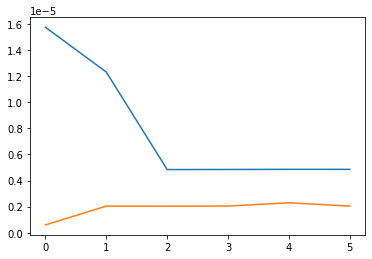

In [19]:
# Checking for possible overfitting
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

In [20]:
X_pred = test_df.values
X_pred_scaled = scalar_X.transform(X_pred)
y_pred_scaled = model.predict(X_pred_scaled)
y_pred = scalar_y.inverse_transform(y_pred_scaled)

12790/12790 [==============================] - 22s 2ms/step


In [ ]:
submission = pd.DataFrame(columns=["ID", 'Hazard_rate'])
submission["ID"] = test_df.index
submission["Hazard_rate"] = y_pred

In [23]:
submission.to_csv("final_submission.csv", index=False)